# Machine Learning Poject: House Price Prediction


<img src='project1.jpg'>

## Define the problem and Goals

The prediction of house prices depends on many features, and as we read and explore the dataset, we find many features that will help us predict the price. On the other hand, there are other features that we should change or remove.

*How can we define the data that should be removed and changed?*

*What is the best machine learning model that will give us the best score and be the best for predicting house prices in the future?*

## The dataset

This dataset covers information on home sales in King County, which includes Seattle. It comprises properties purchased between May 2014 and May 2015.


### *Feature Columns*

**id:** Unique ID for each home sold

**data:** Data house was sold 

**price:** Cost of every house that was purchased.

**bedrooms:** The number of besrooms in the house

**bathrooms:** The number of bathrooms in the house

**sqft_living:** The area of the house in sequare feet.

**sqft_lot:** The size of the land area in square feet.

**floors:** Count of levels in the house.

**waterfront:** House which has a view to a waterfont (It's a dummy variable "0 and 1")

**view:** Feedback regarding the quality of the view, rated from 0 to 4.

**conditions:** The general state of the conditions.

**grade:** The housing unit's general reting, determined according to King country's grading system.

**sqft_above:** The interior living space's square footage that is situated above ground level.

**sqft_basement:** The square footage of the basement

**yr_built:** Year of building

**yr_renovated:** Year of renovated

**zipcode:** The specific zip code region where the house is located

**lat:** Latitude coordinate

**long:** Longitude coordinate

**sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15:** LotSize area in 2015(implies-- some renovations)

## Import necessary library

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from skimpy import skim
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Reading dataset

In [76]:
house_data = pd.read_csv("kc_house_data.csv")
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [77]:
house_data.shape

(21613, 21)

In [78]:
# The features of dataset
print("The name of columns are :\n", house_data.columns)

The name of columns are :
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [79]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The result indicate the type of all the features, which were **int** or **float**, the important step in data science project is define is the feature is categorical or numerical.

**The categorical features:**
1. 'bedrooms' : This represents the categorical feature of the number of bedrooms in a house (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33).
2. 'bathrooms' : It represents the number of bathrooms in a house (from 0 to 8).
3. 'floors': The number of floors in each house can be (1, 1.5, 2, 2.5, 3, 3.5).
4. 'waterfront': It is a categorical feature because it includes whether a house has a waterfront view or not.
5. 'view': It is a categorical feature because it includes the level of view the house has.
6. 'zipcode': It is a categorical feature because it includes different zipcodes or regions.

**The numerical features:**

In the context of data analysis, numerical features often provide information about quantities or measurements of various attributes.
From our dataset the numerical features are: 'price',  'sqft_living',   'sqft_above',  'sqft_basement',  'yr_built',  'yr_renovated', 'sqft_lot', 'lat',  'long',  'sqft_living15',  'sqft_lot15'

In [80]:
house_data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [81]:
bedrooms_counts = house_data['bedrooms'].value_counts().sort_index()
bedrooms_counts

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [82]:
bathrooms_counts = house_data['bathrooms'].value_counts().sort_index()
bathrooms_counts

0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [83]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [85]:
skim(house_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 21613  │ │ int32       │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃          ┃            ┃            ┃            ┃           ┃            ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean     ┃ sd         ┃ p0         ┃ p25        ┃ p75       ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id         │  0 │    0 │ -3200000 │ 1200000000 │ -210000000 │ -100000000 │ 980000000 │ 2100000000 │ ▆█▆▇█▅ │  │
│ │            │    │      │          │            │          0 │          0 │           │            │        │  │
│ │ price      │  0 │    0 │   540000 │     370000 │      75000 │     320000 │    640000 │    7700000 │   █    │  │
│ │ bedrooms   │  0 │    0 │      3.4 │       0.93 │          0 │          3 │         4 │         33 │   █    │  │
│ │ bathrooms  │  0 │    0 │      2.1 │       0.77 │          0 │        1.8 │       2.5 │          8 │  ▂█▂   │  │
│ │ sqft_livin │  0 │    0 │     2100 │        920 │        290 │       1400 │      2600 │      14000 │   █▃   │  │
│ │ g          │    │      │          │            │            │            │           │            │        │  │
│ │ sqft_lot   │  0 │    0 │    15000 │      41000 │        520 │       5000 │     11000 │    1700000 │   █    │  │
│ │ floors     │  0 │    0 │      1.5 │       0.54 │          1 │          1 │         2 │        3.5 │  █▁▆   │  │
│ │ waterfront │  0 │    0 │   0.0075 │      0.087 │          0 │          0 │         0 │          1 │   █    │  │
│ │ view       │  0 │    0 │     0.23 │       0.77 │          0 │          0 │         0 │          4 │   █    │  │
│ │ condition  │  0 │    0 │      3.4 │       0.65 │          1 │          3 │         4 │          5 │    █▃▁ │  │
│ │ grade      │  0 │    0 │      7.7 │        1.2 │          1 │          7 │         8 │         13 │   ▁█▂  │  │
│ │ sqft_above │  0 │    0 │     1800 │        830 │        290 │       1200 │      2200 │       9400 │  █▄▁   │  │
│ │ sqft_basem │  0 │    0 │      290 │        440 │          0 │          0 │       560 │       4800 │   █▁   │  │
│ │ ent        │    │      │          │            │            │            │           │            │        │  │
│ │ yr_built   │  0 │    0 │     2000 │         29 │       1900 │       2000 │      2000 │       2000 │ ▂▂▅▆▇█ │  │
│ │ yr_renovat │  0 │    0 │       84 │        400 │          0 │          0 │         0 │       2000 │   █    │  │
│ │ ed         │    │      │          │            │            │            │           │            │        │  │
│ │ zipcode    │  0 │    0 │    98000 │         54 │      98000 │      98000 │     98000 │      98000 │ █▇▂▇▃▂ │  │
│ │ lat        │  0 │    0 │       48 │       0.14 │    

The figure displays important details about our dataset. It tells us the average price is $540,000 The lowest price is $75,000, while the highest is $7,700,000.

By looking at this figure, we can find all the necessary information.



# Data Cleaning and Preprocessing

The initial step in data sleaning and preprocessing involves modifying thedata type of the **'bathrooms'** feature. Initially,it was stored as a decimal number (float), but we will convert it to integer number.

In [86]:
house_data['bathrooms'] = house_data['bathrooms'].astype(int)

In [87]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Handle missing data

In this step, we're performing two tasks related to handling missing data: using the **isna** function to check for missing values and utilizing the **msno** library for exploratory visualization of missing data.

* **The 'isna' function:** 

Is a built-in method in pandas, a Python library commonly used for data manipulation and analysis. This function allows you to identify missing (null or NaN) values in a DataFrame or Series.

In [88]:
house_data.isna().sum()   ## Count Filled cells
                          ## Sum empty cells

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* **The 'msno' library:**

Is specifically designed for visualizing missing data patterns in a dataset. It provides functions to create various types of plots that help you understand the distribution and relationships of missing values. 

<Axes: >

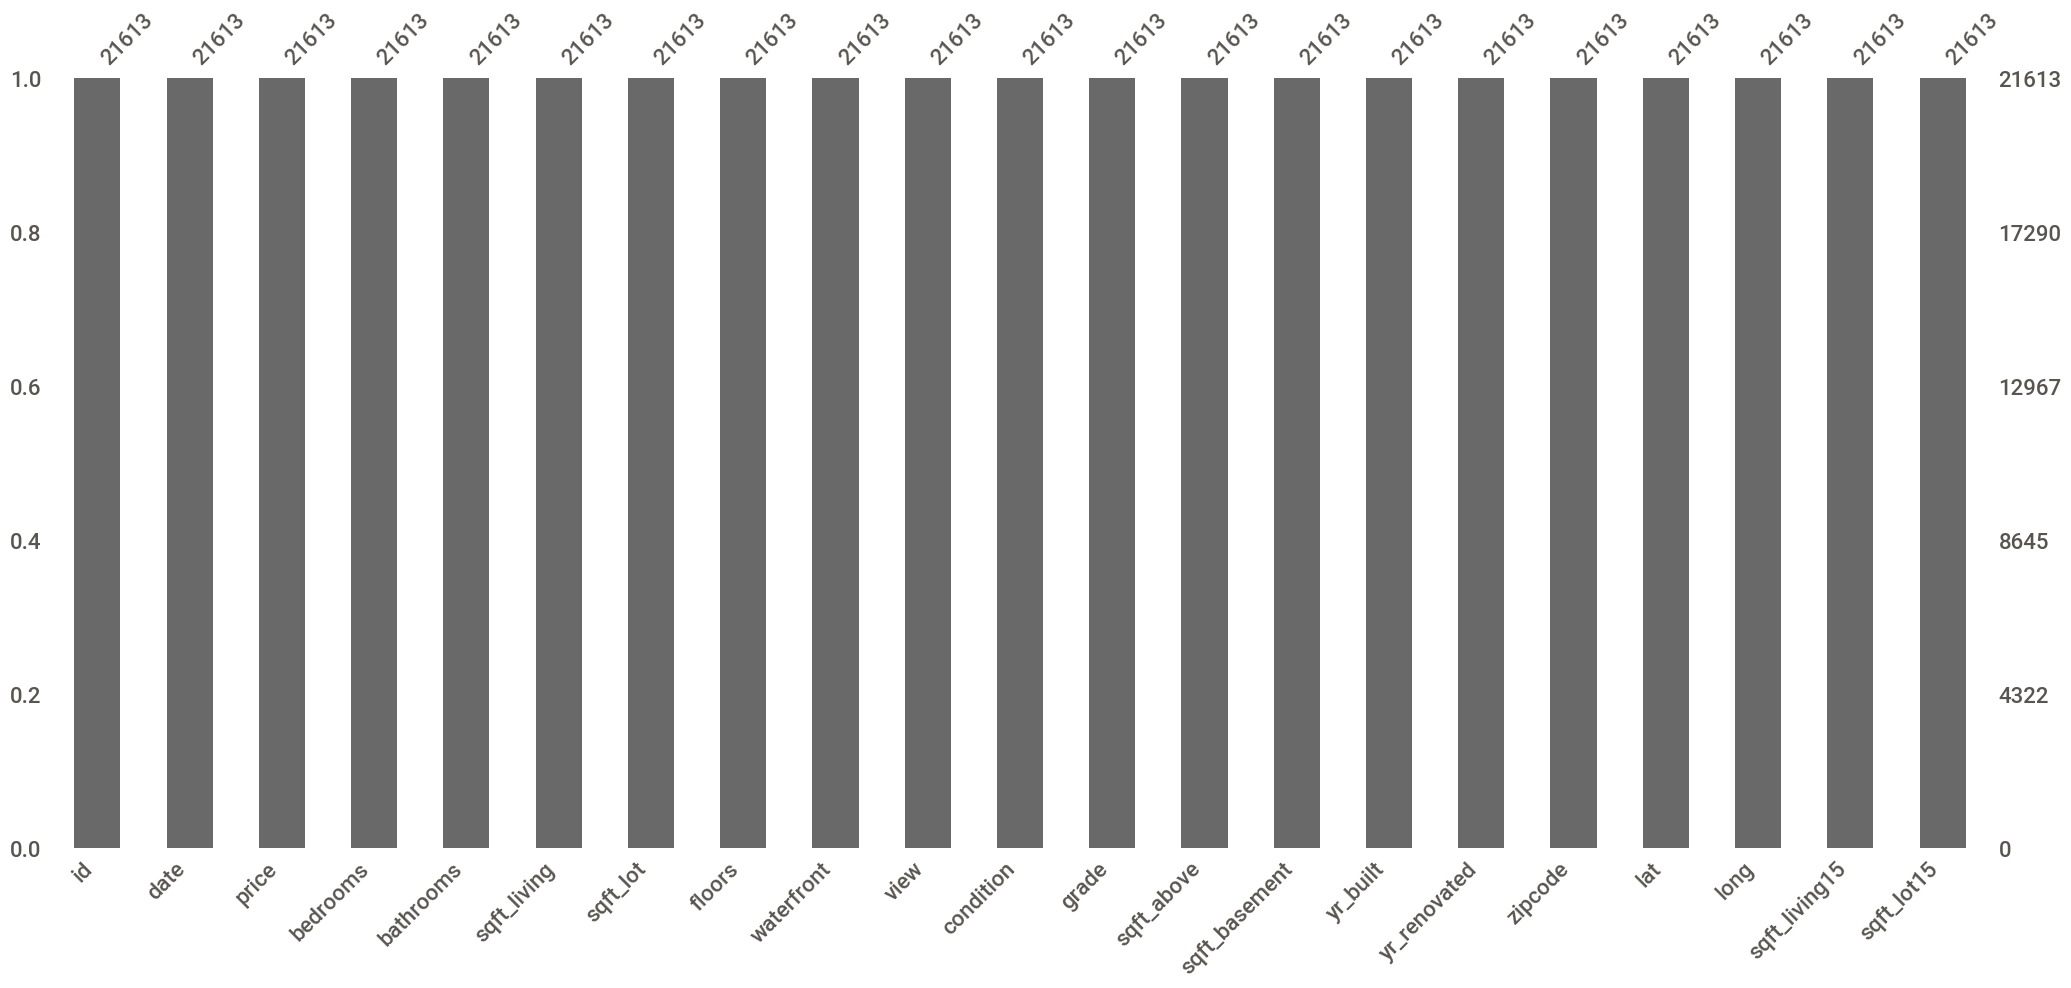

In [89]:
msno.bar(house_data)

The results show great points; we don't have any missing values in our dataset. This indicates that all the cells in our dataset contain valid data without any missing or null values.

### Check if there duplicate records

In [90]:
# Check for duplicates in the entire DataFrame
duplicates = house_data[house_data.duplicated()]

In [91]:
# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate rows in the dataset:")
    print(duplicates)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


### Remove Columns

When we work with data for analysis, cleaning, and creating models, one of the initial steps is getting rid of things we don't need. In our dataset, there are two pieces of information that won't really help us predict the price. Removing them is good because it makes our data smaller, which means we can work with it faster. 

**But we have to be careful which ones we remove, because if we delete the wrong ones, the model we build might not work well. So, choosing what to remove is important for the model to be accurate.**

In [92]:
columns_to_remove = ['yr_built', 'yr_renovated']


In [93]:
house_data = house_data.drop(columns = columns_to_remove)
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287


### Feature engineering

In [94]:
print(house_data.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [95]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['year'] = house_data['date'].dt.year
house_data['month'] = house_data['date'].dt.month
house_data['day'] = house_data['date'].dt.day

house_data = house_data.drop("date",axis=1)

house_data.sample()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
14543,2026049122,425000.0,3,1,1120,6653,1.0,0,0,4,...,1120,0,98133,47.7321,-122.334,1580,7355,2015,4,1


For making particular charts and gaining a better grasp of the data, we perform a process called feature engineering on the date information. This involves breaking down the **date** into its components like **year**, **month**, and **day**.

# Exploratory Data Analysis (EDA)

### Visualize and summarize the data

In [96]:
print('Importing Libraries ... ',end='')
import sweetviz as sv
import pandas as pd
print('Done')

Importing Libraries ... Done


In [97]:
import warnings
warnings.filterwarnings('ignore')

# Analyzing data
report=sv.analyze(house_data)

# Generating report
report.show_html('Houses_Sales.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Houses_Sales.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


This code snippet is related to a data analysis process using the **Pandas-profiling** library, which generates interactive and informative *HTML* reports about a dataset.

In summary, this code analyzes a dataset named **house_data** and then generates an interactive *HTML* report summarizing the data's characteristics. Warnings during this process are suppressed to ensure a clean output. The resulting *HTML* report was opened in a web browser to explore the data analysis insights.

### Correlation matrix

In [98]:
# Calculate correlation matrix
correlation_matrix = house_data.corr()


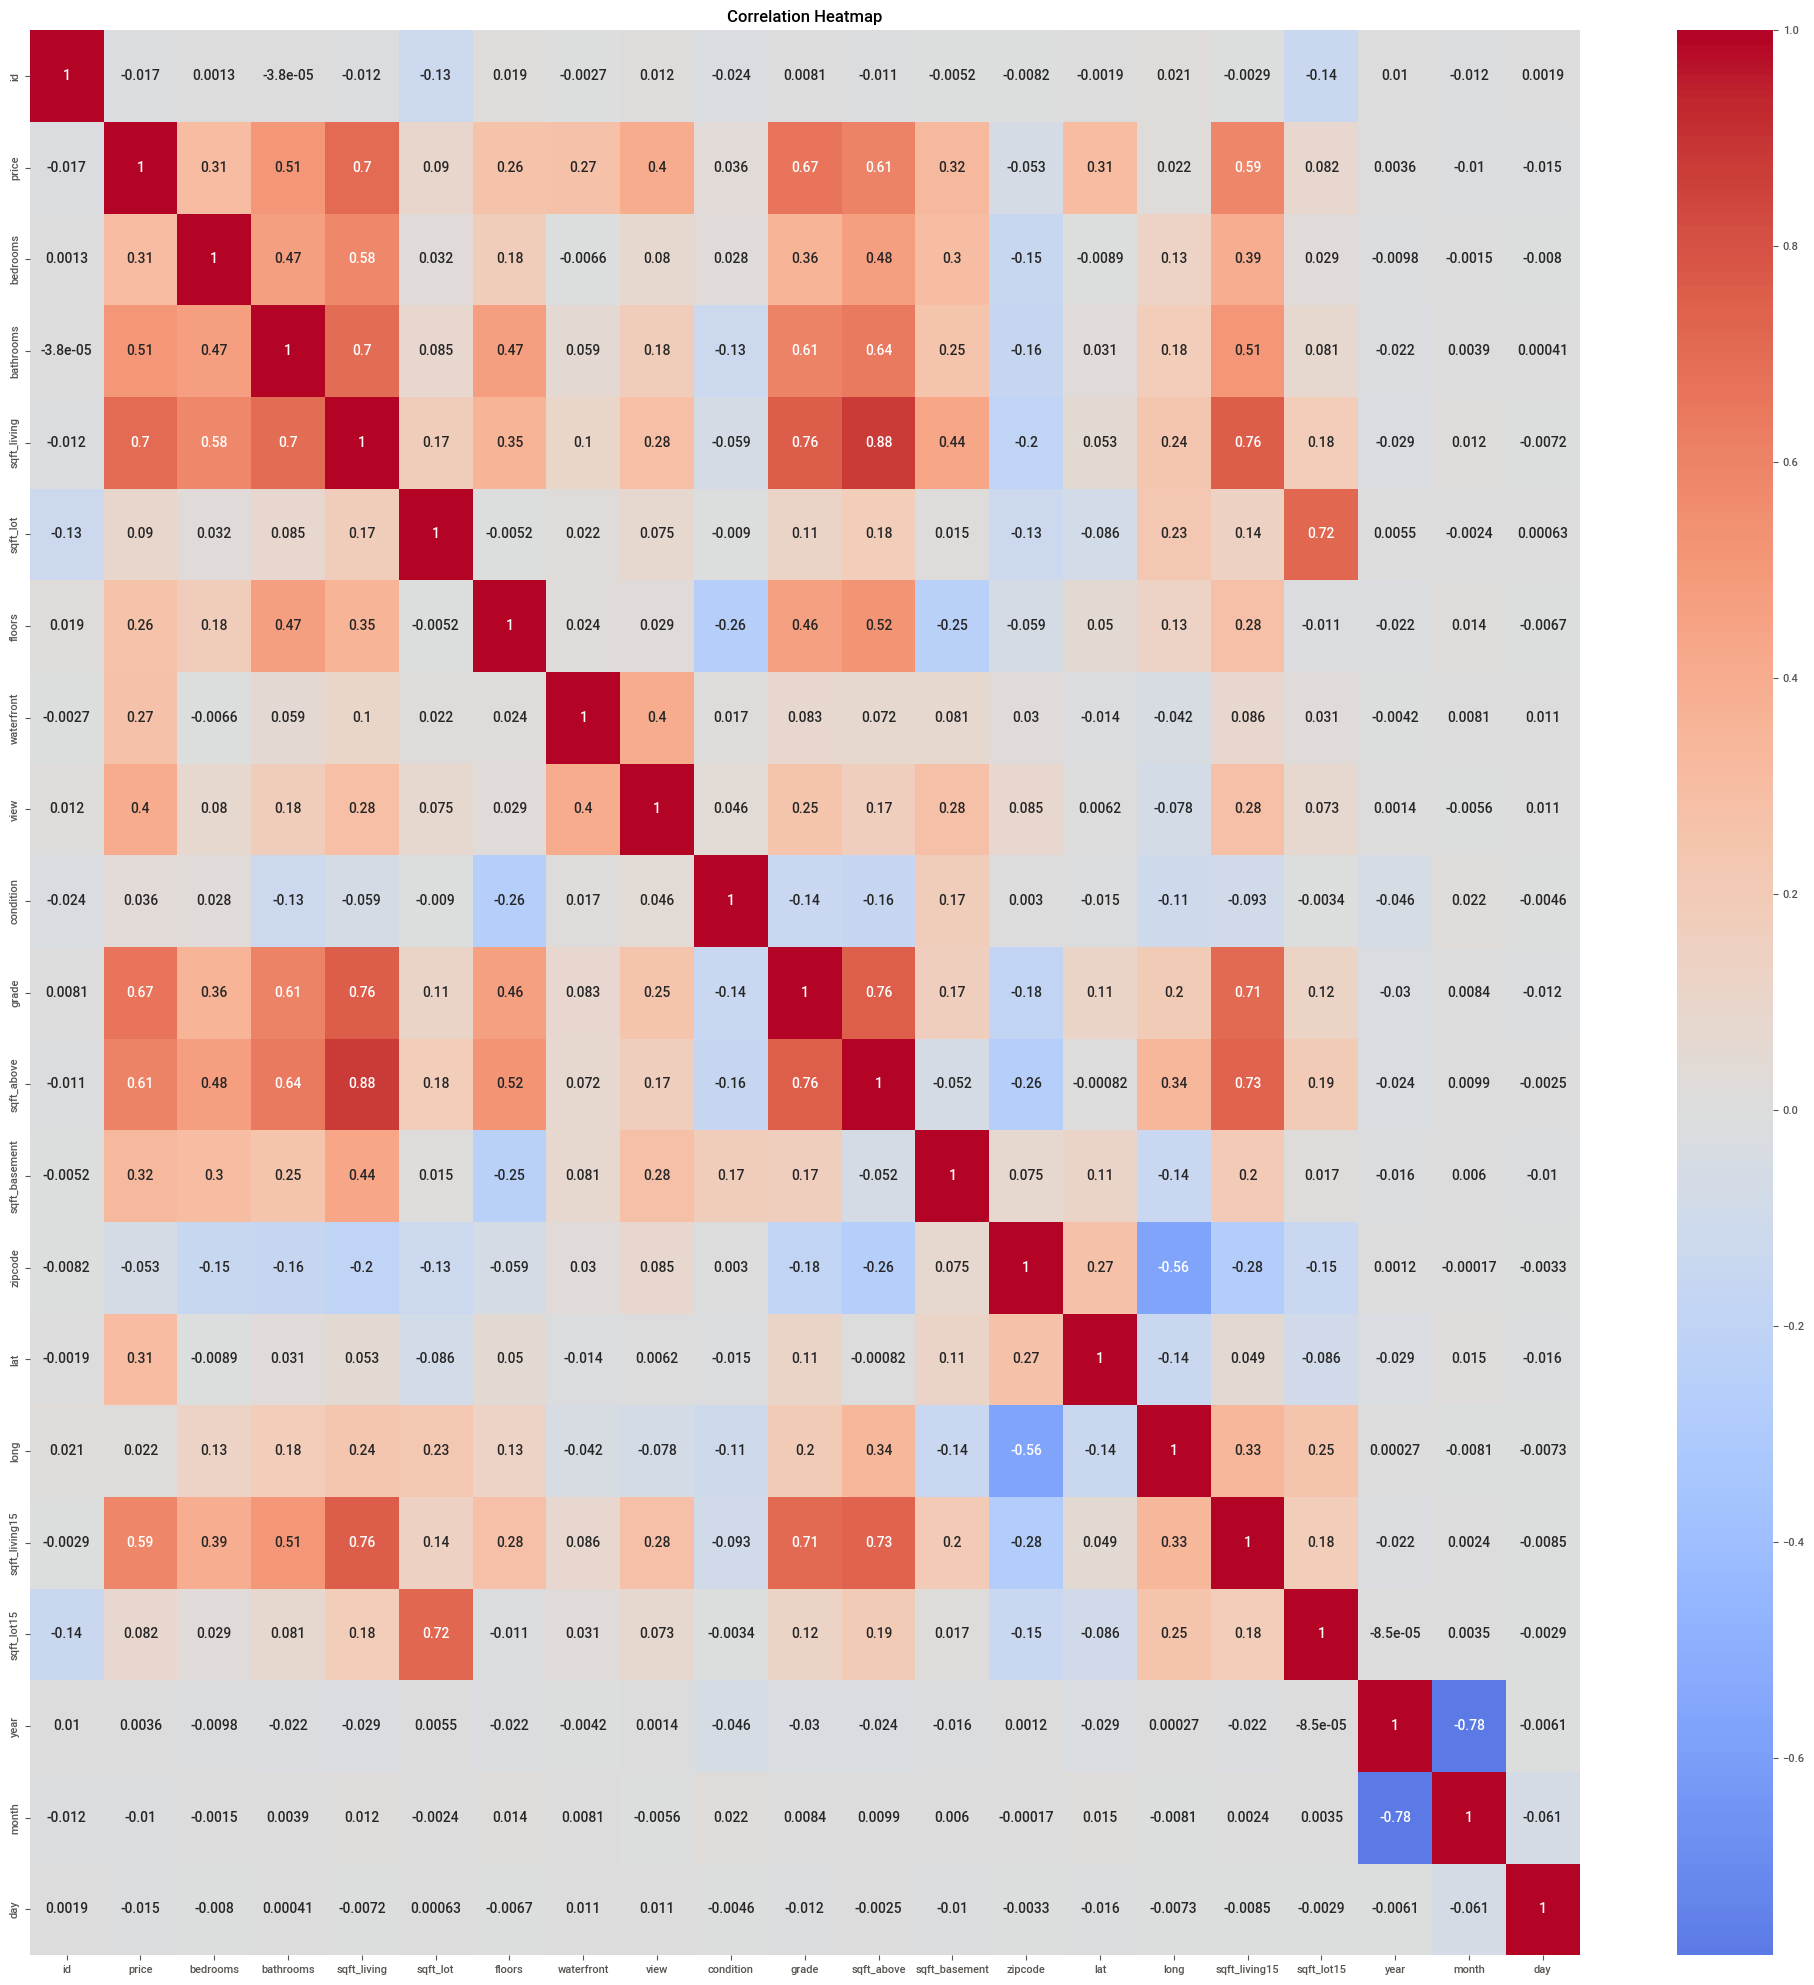

In [99]:
# Create a heatmap to visualize correlatios
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


The correlation matrix displays both strong and weak correlations among variables. Notably, strong correlations are frequently observed between several variables and the 'price' feature. This is particularly evident with variables such as **'sqft_living,'**  **'grade,'** and **'sqft_above.'**  It means that there is a notable statistical relationship or connection between them. In simpler terms, when one feature changes, the price tends to change in a consistent and predictable way.

</font></b>

### Scatter plots

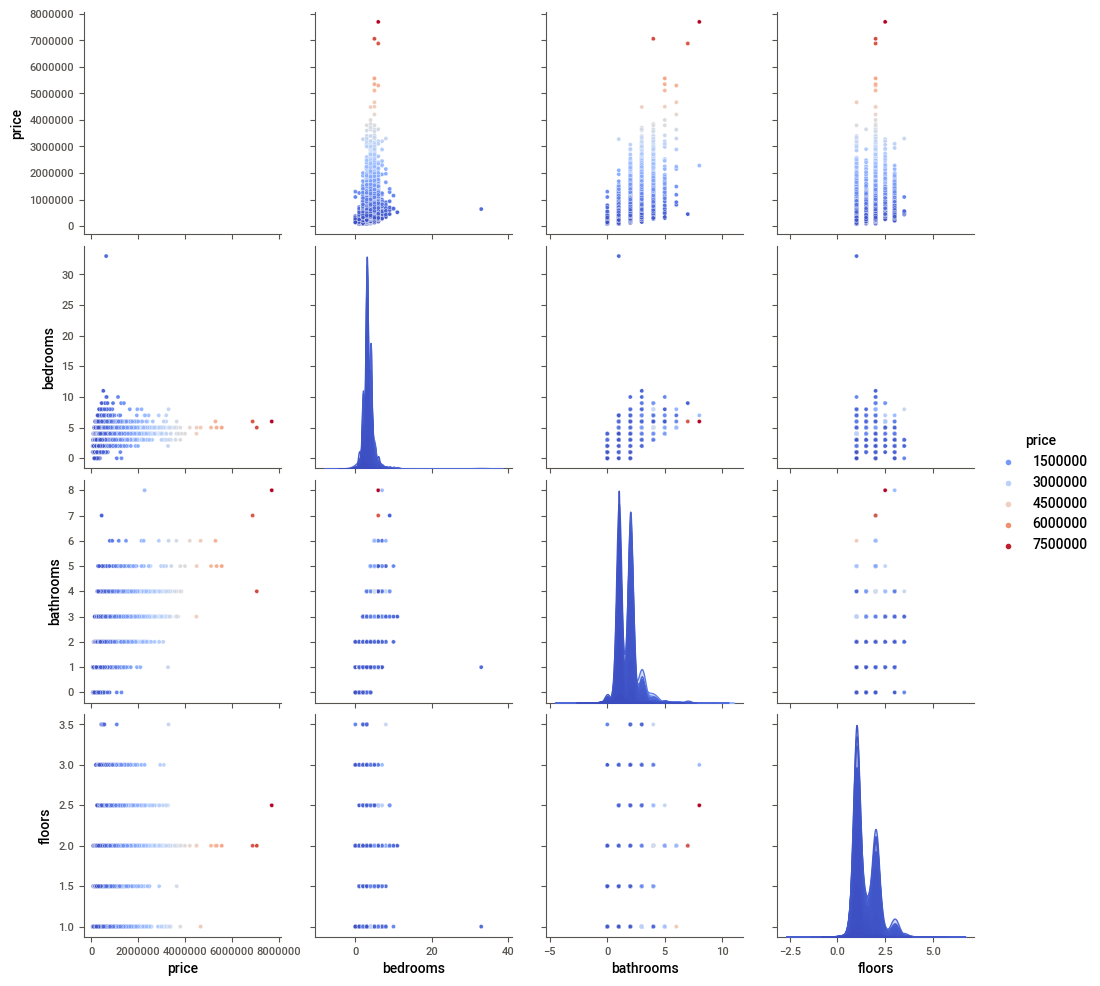

In [100]:
# Create scatter plots to visualize relationships
sns.pairplot(house_data, vars=['price', 'bedrooms', 'bathrooms','floors'], 
             diag_kind='kde', hue='price', palette='coolwarm')
plt.show()

### Subplots

Use the function **regplot** in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

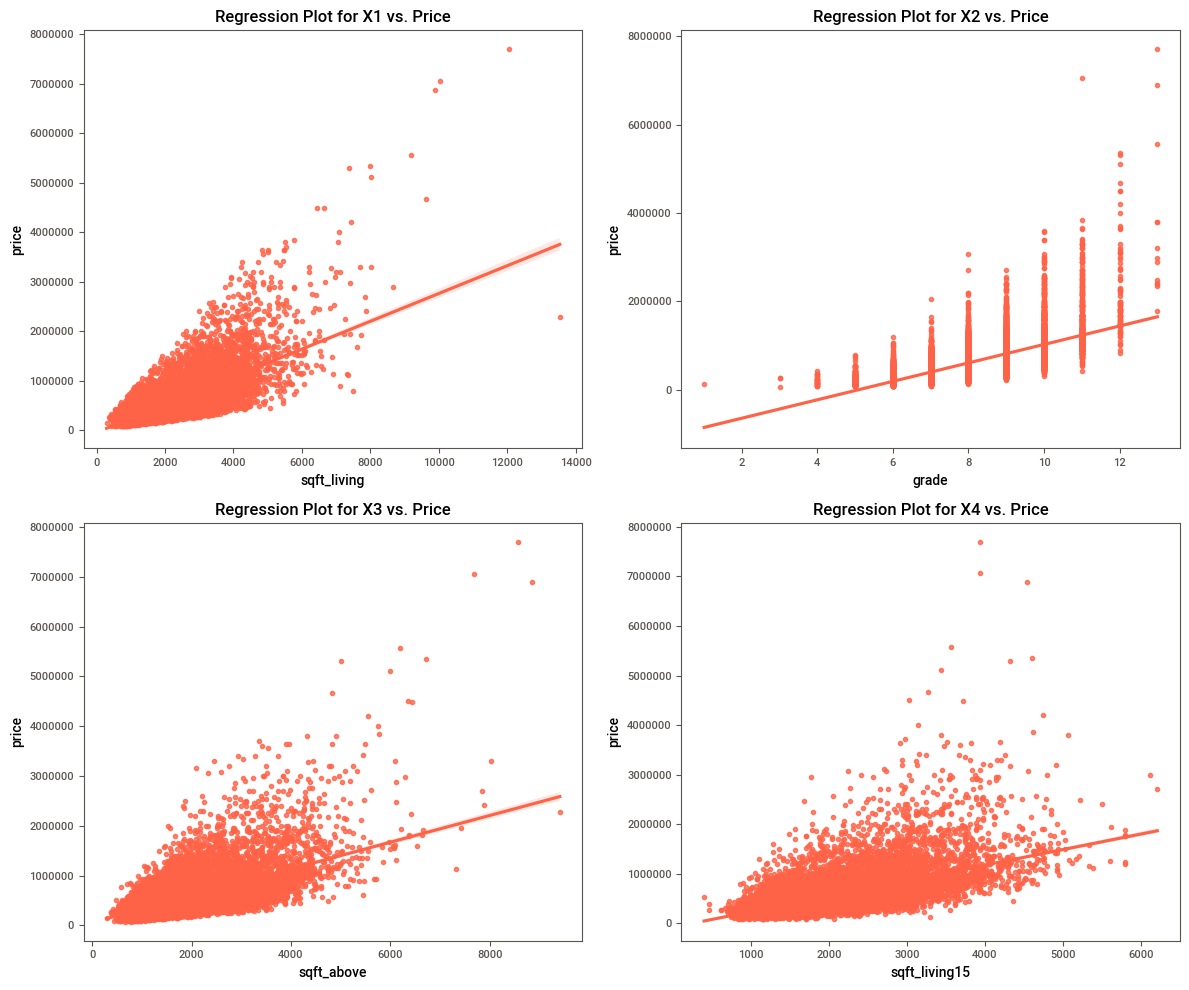

In [101]:
# Create subplots for multiple regression plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create regression plots for each variable with 'coolwarm' colormap
sns.regplot(x='sqft_living', y='price', data=house_data, ax=axes[0, 0], color='tomato')
axes[0, 0].set_title('Regression Plot for X1 vs. Price')

sns.regplot(x='grade', y='price', data=house_data, ax=axes[0, 1], color='tomato')
axes[0, 1].set_title('Regression Plot for X2 vs. Price')

sns.regplot(x='sqft_above', y='price', data=house_data, ax=axes[1, 0], color='tomato')
axes[1, 0].set_title('Regression Plot for X3 vs. Price')

sns.regplot(x='sqft_living15', y='price', data=house_data, ax=axes[1, 1], color='tomato')
axes[1, 1].set_title('Regression Plot for X4 vs. Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Boxplots

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price by Month Box Plot')]

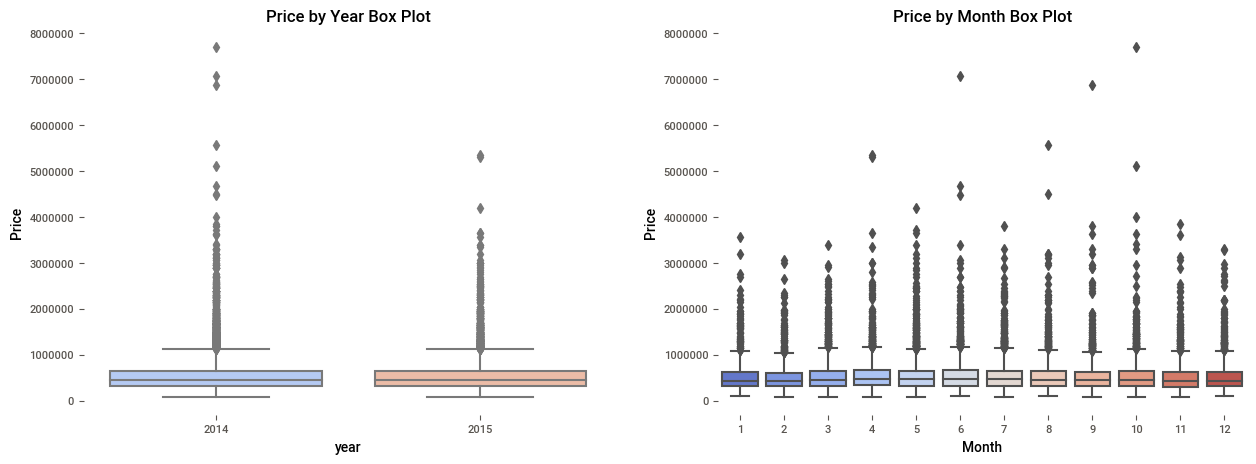

In [105]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=house_data, ax=axes[0], palette='coolwarm')
sns.boxplot(x='month',y='price',data=house_data, ax=axes[1], palette='coolwarm')
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')


### Bar chart

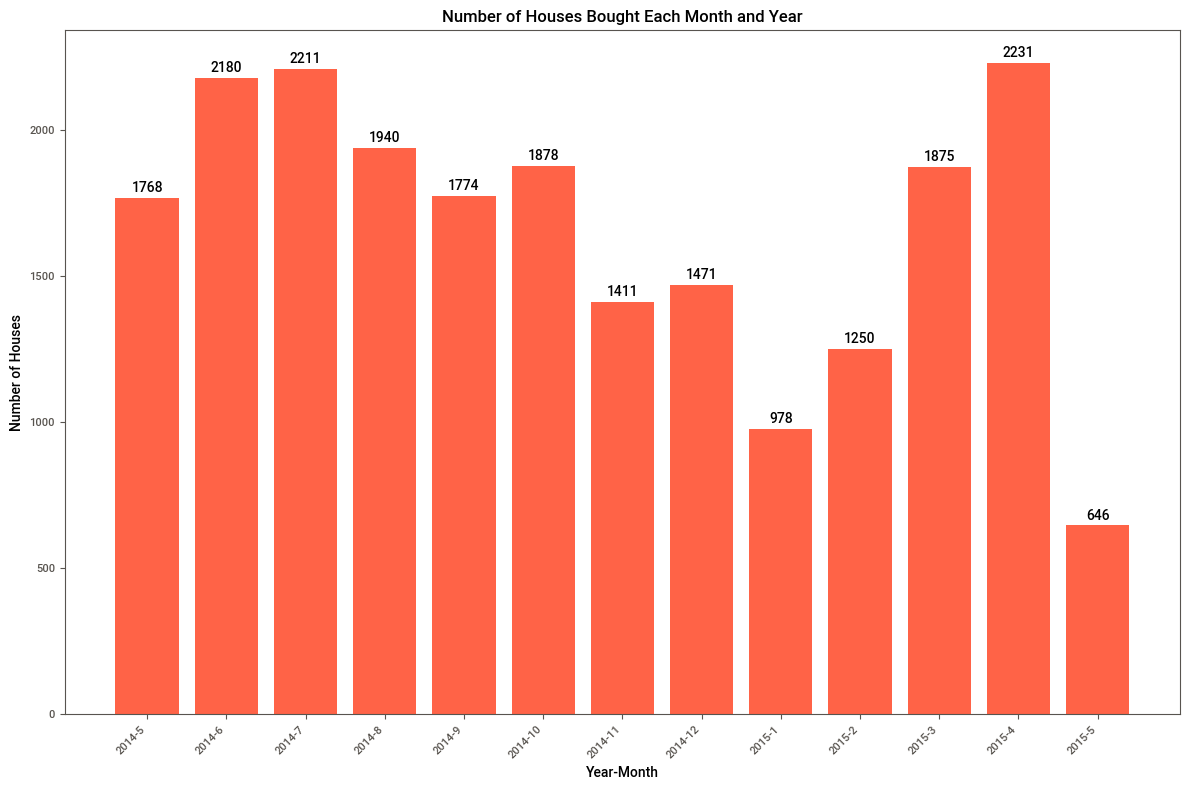

In [106]:
# Group the data by year and month and count the number of houses bought
house_count = house_data.groupby(['year', 'month']).size().reset_index(name='count')

# Create a bar chart to visualize the number of houses bought each month and each year
plt.figure(figsize=(12, 8))
bars = plt.bar(house_count['year'].astype(str) + '-' + house_count['month'].astype(str), house_count['count'], color='tomato')
plt.title('Number of Houses Bought Each Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Houses')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, int(bar.get_height()), ha='center', va='bottom')

# Show the bar chart
plt.tight_layout()
plt.show()


* Between May and December of 2014, there is a modest fluctuation in the number of purchased houses, with some periods of increase and decrease.

* Conversely, from January to May of 2015, the monthly house purchases show irregular patterns. There's a decline in May with the lowest count of 646 houses, followed by a notable surge to 2231 houses, which marks the highest count for the entire year.

In [107]:
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

# Models Development

## Split the dataset

In [108]:
X = house_data[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','condition','grade',
       'sqft_above', 'sqft_basement', 'zipcode','lat','long', 'sqft_living15','sqft_lot15' ]]

Y = house_data['price']

We divided the dataset into two segments: one for training and the other for testing. The **training** set accounted for **80%** of the data, while the **testing** set made up the remaining **20%.**

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [110]:
print('The shape of the x_train:',x_train.shape)
print('The shape of the y_train:',y_train.shape)
print('The shape of the x_test:',x_test.shape)
print('The shape of the y_test:',y_test.shape)

The shape of the x_train: (17290, 16)
The shape of the y_train: (17290,)
The shape of the x_test: (4323, 16)
The shape of the y_test: (4323,)


## 1/LinearRegression Model

In [111]:
lm = LinearRegression()

In [112]:
lm.fit(x_train, y_train)

LinearRegression()

In [113]:
lm.score(x_train, y_train)

0.6804155201301318

In [114]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-31316.298344
bathrooms,27954.365426
sqft_living,111.080703
sqft_lot,0.108548
floors,-28474.957727
waterfront,605395.921479
view,58693.792907
condition,51373.741105
grade,77772.769108
sqft_above,71.161647


### The prediction 

In [115]:
y_pred = lm.predict(x_test)
y_pred

array([ 33408.57459993, 266532.53653664, 401764.78240927, ...,
       686388.31705759, 992432.37669624, 345357.9809812 ])

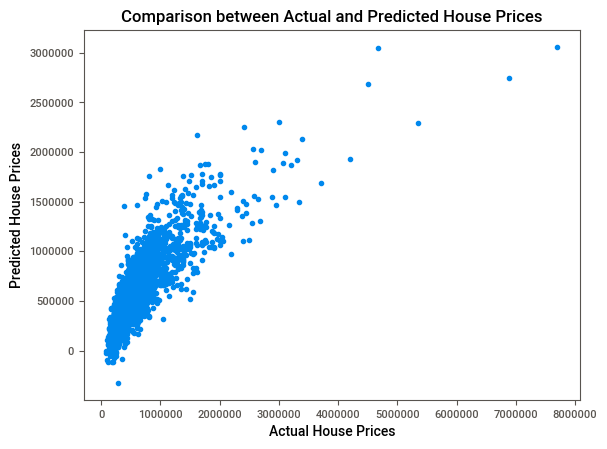

In [116]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Comparison between Actual and Predicted House Prices")
plt.show()


<Axes: xlabel='price', ylabel='Density'>

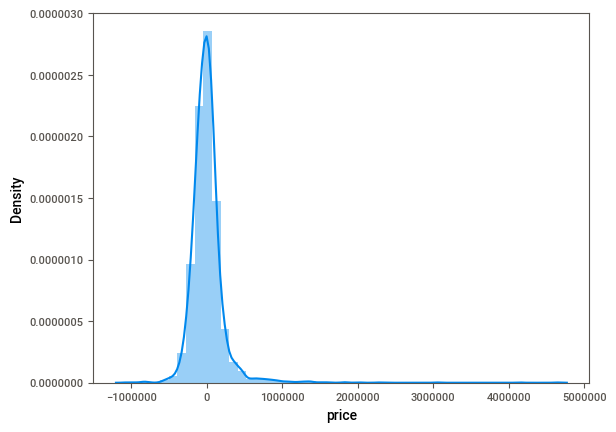

In [117]:
sns.distplot((y_test-y_pred),bins=50)

In [118]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 52759614057.81133
R-squared: 0.6714478819047615


In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)


MAE: 133329.17240117537
MSE: 52759614057.81133
RMSE: 229694.61042395254
Variance Regression Score:  0.6716770757348454


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


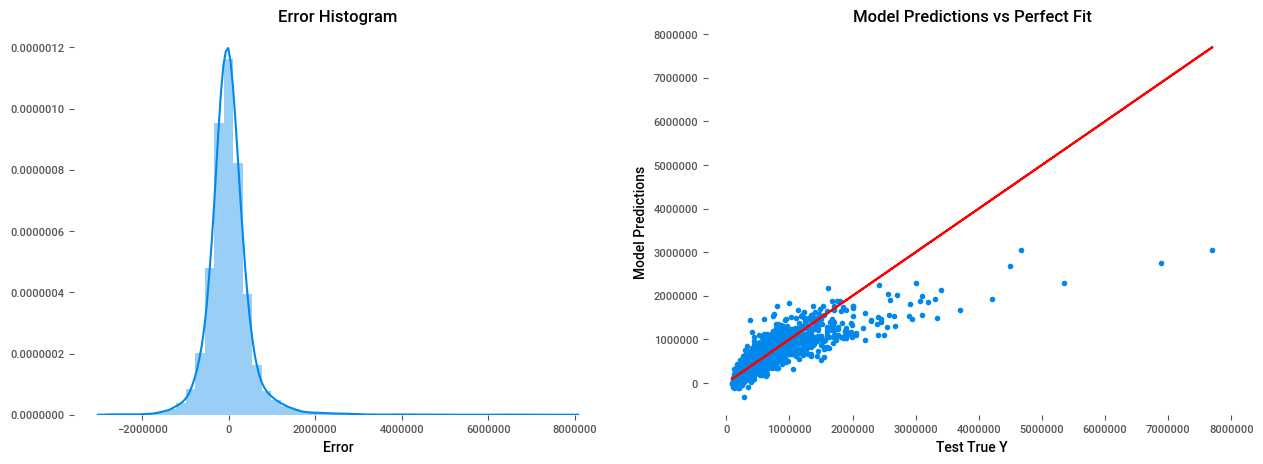

In [120]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4323 , 1) - y_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit');

In [122]:
data = house_data.iloc[0]
data

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
zipcode          9.817800e+04
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
year             2.014000e+03
month            1.000000e+01
day              1.300000e+01
Name: 0, dtype: float64

In [123]:
new_data = pd.DataFrame(data)
new_data

,0
id,7.129301e+09
price,2.219000e+05
bedrooms,3.000000e+00
bathrooms,1.000000e+00
sqft_living,1.180000e+03
sqft_lot,5.650000e+03
floors,1.000000e+00
waterfront,0.000000e+00
view,0.000000e+00
condition,3.000000e+00


In [124]:
X =['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','condition','grade',
       'sqft_above', 'sqft_basement', 'zipcode','lat','long', 'sqft_living15','sqft_lot15' ]

df_filtered = house_data.loc[:, X]
new_data = pd.DataFrame(df_filtered)
new_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,2,1,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509
21609,4,2,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200
21610,2,0,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007
21611,3,2,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287


In [125]:
old_price = house_data['price'].iloc[0]
old_price

221900.0

In [126]:
#you can use the trained model for predictions with new data
predicted_price = lm.predict(new_data)
print("Predicted Price for New House:", predicted_price[0])

Predicted Price for New House: 220838.8453458175


## 2/Polynomial Regression Model

In [127]:
Ridge_test = Ridge(alpha=1)


In [128]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr
Ridge_test.fit(x_train_pr, y_train)
Ridge_test.score(x_train_pr, y_train)

0.8054792479955922

In [129]:
single_house = house_data.iloc[0]
single_house

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
zipcode          9.817800e+04
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
year             2.014000e+03
month            1.000000e+01
day              1.300000e+01
Name: 0, dtype: float64

In [130]:
y_pred = Ridge_test.predict(x_test_pr)
y_pred

array([ 42796.85816288, 353457.01347542, 326346.94363499, ...,
       618334.2539587 , 838312.91097069, 313854.03305244])

In [131]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 30582329551.05269
R-squared: 0.809553399324055


In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print('Variance Regression Score: ',explained_variance_score(y_test,y_pred))

print('\n\nDescriptive Statistics:\n',house_data['price'].describe())

MAE: 107781.54629585364
MSE: 30582329551.05269
RMSE: 174878.04193509454
Variance Regression Score:  0.8096126636190963


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

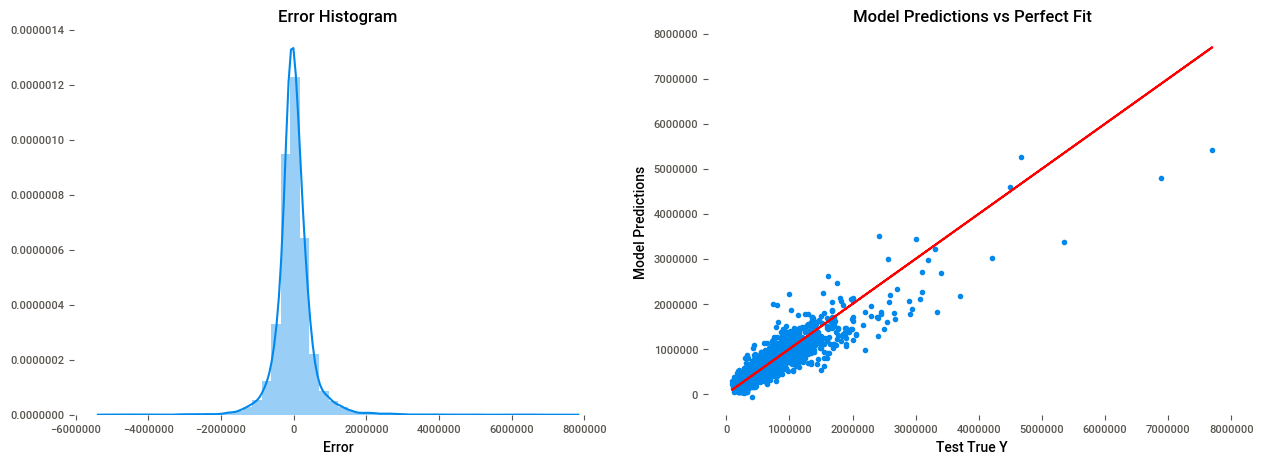

In [133]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4323 , 1) - y_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [134]:
old_price = house_data['price'].iloc[0]
old_price


221900.0

In [135]:
#you can use the trained model for predictions with new data
new_data = pr.fit_transform(new_data)
predicted_price = Ridge_test.predict(new_data)
print("Predicted Price for New House:", predicted_price[0])

Predicted Price for New House: 302452.3763923645


# Results Summary

The project commenced by defining the addressed problem and comprehending the dataset through data exploration, including 

statistical ranges, graphs, HTML analysis reports, and more.

Forecasting the price involves selecting an optimal model that provides high accuracy and minimal loss. To achieve this, 

multiple models are created, compared, and evaluated to determine the most suitable one. Our focus was on two models: *linear

regression and polynomial regression.*

* **Results of Linear Regression:**
- Mean Squared Error: 52,759,614,057.81
- R-squared: 0.67
- Variance Regression Score: 0.67

* **Results of Polynomial Regression:**
- Mean Squared Error: 30,582,329,551.05
- R-squared: 0.81
- Variance Regression Score: 0.81

In conclusion, the Polynomial Regression model is deemed the optimal choice for this dataset.